In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy import stats
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
from itertools import combinations
from dtw import *
from scipy.signal import welch
import statsmodels.api as sm

In [120]:
data1 = pd.read_csv('b30hz10.txt', sep = "\t", header=None)# норм
data2 = pd.read_csv('h30hz10.txt', sep = "\t", header=None)# не норм

data1.rename(columns={0: "$1", 1: "$2", 2: "$3", 3: "$4"})
data1.drop(columns=[4], inplace=True)

data2.rename(columns={0: "$1", 1: "$2", 2: "$3", 3: "$4"})
data2.drop(columns=[4], inplace=True)

data1.head()

,0,1,2,3
0,1.260410,-1.35726,-1.916330,1.84570
1,-0.126204,-2.27283,0.536155,1.53092
2,-0.903164,-1.04204,-0.741337,1.65011
3,-1.693560,2.79295,-0.066998,2.01735
4,-3.556980,2.11411,0.225473,2.32982


<Axes: >

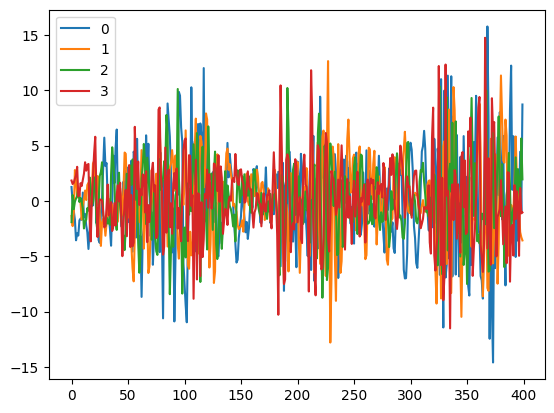

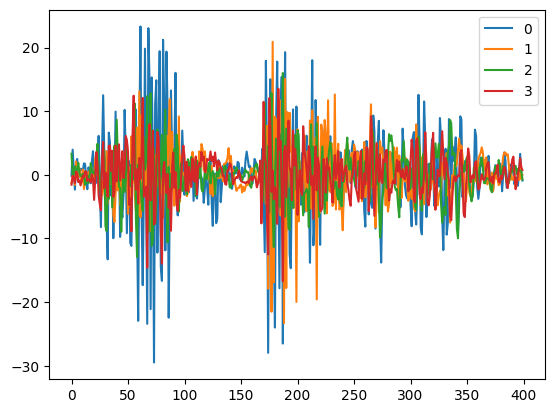

In [121]:
start = 0
end = 400

data1 = data1[start:end]
data2 = data2[start:end]
data1.plot()
data2.plot()

Корелляция сингналов из набора Data1
---

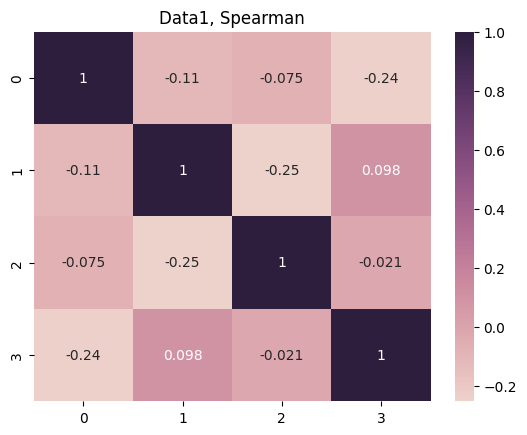

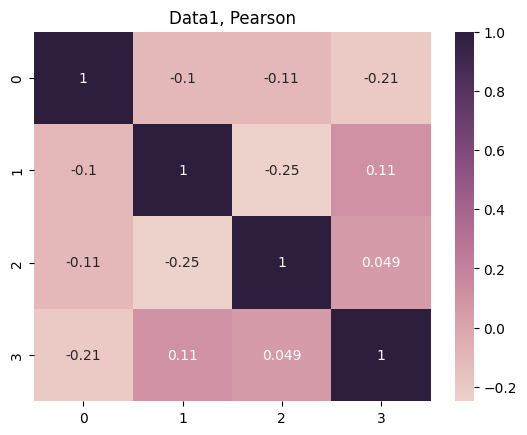

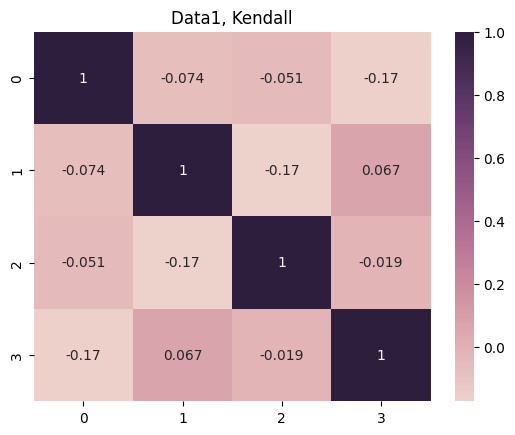

In [122]:
# Корреляция Спирмена
corr_spearman = data1.corr(method="spearman")
sns.heatmap(corr_spearman, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title("Data1, Spearman")
plt.show()

# Корреляция Пирсона
corr_pearson = data1.corr(method="pearson")
sns.heatmap(corr_pearson, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title("Data1, Pearson")
plt.show()

# Корреляция Кендалла
corr_kendall = data1.corr(method="kendall")
sns.heatmap(corr_kendall, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title("Data1, Kendall")
plt.show()

Корелляция между сигналами наборов Data1 и Data2

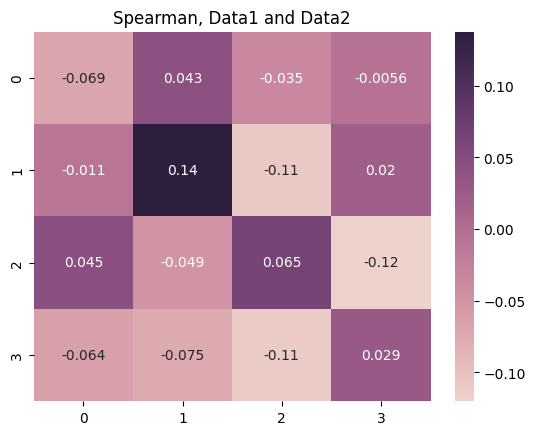

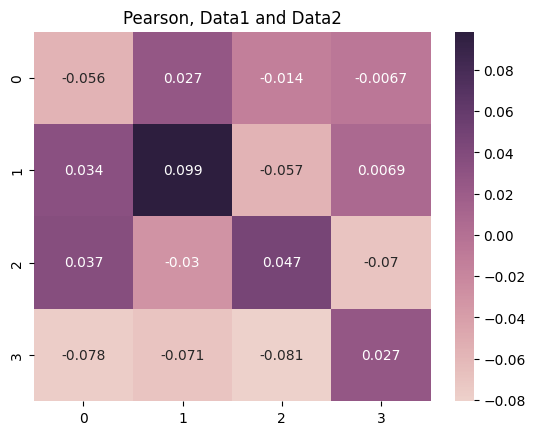

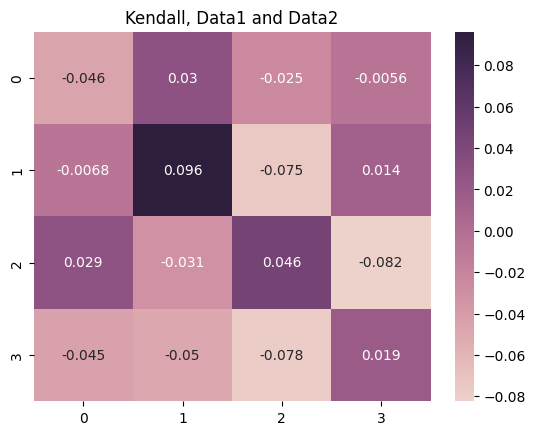

In [123]:
# Создаем массив для хранения результатов корреляции
corr_spearman = np.zeros((4, 4))
corr_pearson = np.zeros((4, 4))
corr_kendall = np.zeros((4, 4))

# Вычислим корреляцию Спирмена для всех сочетаний сигналов
for i in range(4):
    for j in range(4):
        query = data2.iloc[:, i].to_numpy()
        template = data1.iloc[:, j].to_numpy()
        corr_spearman[i, j] = stats.spearmanr(query, template).correlation # Корреляция Спирмена
        corr_pearson[i, j] = np.corrcoef(query, template)[0, 1]  # Корреляция Пирсона
        corr_kendall[i, j] = stats.kendalltau(query, template).correlation  # Корреляция Кендалла

# Визуализируем результаты с использованием тепловой карты
# Корреляция Спирмена
sns.heatmap(corr_spearman, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title("Spearman, Data1 and Data2")
plt.show()

# Корреляция Пирсона
sns.heatmap(corr_pearson, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title("Pearson, Data1 and Data2")
plt.show()

# Корреляция Кендалла
sns.heatmap(corr_kendall, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title("Kendall, Data1 and Data2")
plt.show()

DTW (Dynamic Time Warping) - это метод, используемый для сравнения и анализа временных рядов. Он предназначен для измерения сходства между двумя временными рядами, учитывая возможные различия во временной шкале и искажениях.

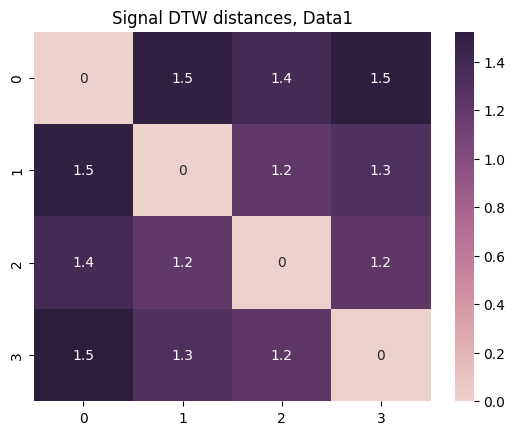

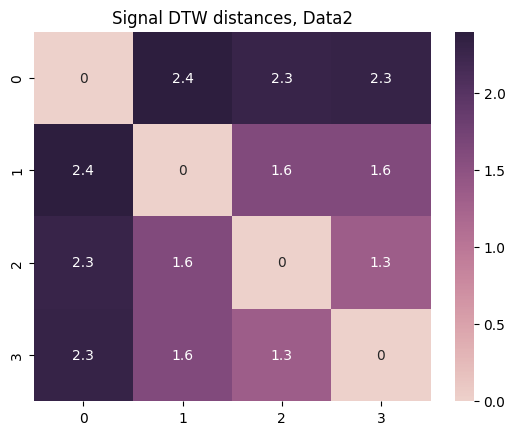

In [124]:
dtw_res = np.zeros((4, 4))

# Переберите все сочетания временных рядов
for i in range(4):
    for j in range(4):
        query = data1.iloc[:, i].to_numpy()
        template = data1.iloc[:, j].to_numpy()
        dtw_distance = dtw(query, template, keep_internals=True)
        dtw_res[i, j] = dtw_distance.normalizedDistance

# Визуализация результатов с использованием тепловой карты
sns.heatmap(dtw_res, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title("Signal DTW distances, Data1")
plt.show()

dtw_res = np.zeros((4, 4))

# Переберите все сочетания временных рядов
for i in range(4):
    for j in range(4):
        query = data2.iloc[:, i].to_numpy()
        template = data2.iloc[:, j].to_numpy()
        dtw_distance = dtw(query, template, keep_internals=True)
        dtw_res[i, j] = dtw_distance.normalizedDistance

# Визуализация результатов с использованием тепловой карты
sns.heatmap(dtw_res, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title("Signal DTW distances, Data2")
plt.show()

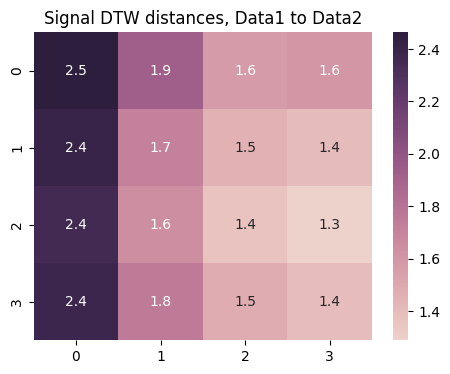

In [125]:
dtw_res_data1_data2 = np.zeros((4, 4))

# Перебераем все сочетания временных рядов из Data1 и Data2
for i in range(4):
    for j in range(4):
        query_data1 = data1.iloc[:, i].to_numpy()
        template_data2 = data2.iloc[:, j].to_numpy()
        dtw_distance_data1_data2 = dtw(query_data1, template_data2, keep_internals=True)
        dtw_normalized_distance_data1_data2 = dtw_distance_data1_data2.normalizedDistance
        dtw_res_data1_data2[i, j] = dtw_normalized_distance_data1_data2

# Визуализация результатов DTW между Data1 и Data2 с использованием тепловой карты
plt.figure(figsize=(12, 4))
plt.subplot(121)
sns.heatmap(dtw_res_data1_data2, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title("Signal DTW distances, Data1 to Data2")

plt.show()

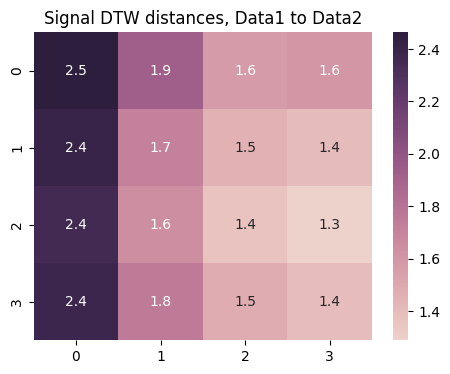

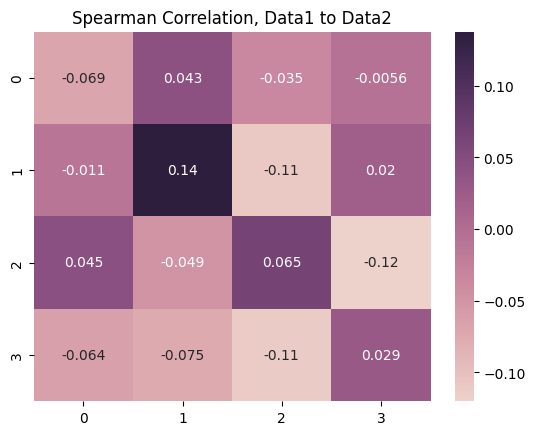

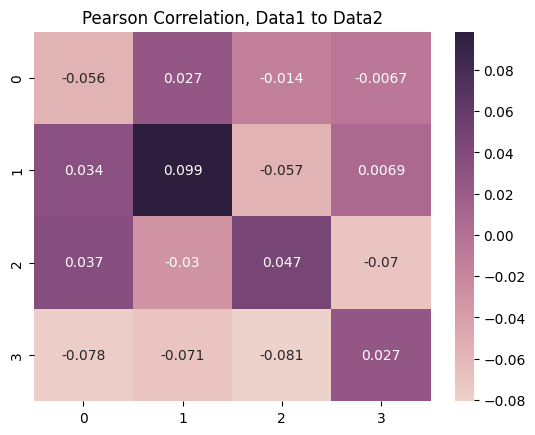

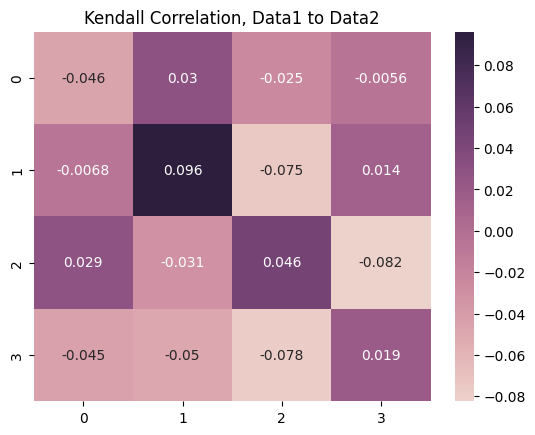

In [126]:
# Вычислим DTW расстояния для Data1 и Data2
dtw_res_data1_data2 = np.zeros((4, 4))

for i in range(4):
    for j in range(4):
        query_data1 = data1.iloc[:, i].to_numpy()
        template_data2 = data2.iloc[:, j].to_numpy()
        dtw_distance_data1_data2 = dtw(query_data1, template_data2, keep_internals=True)
        dtw_normalized_distance_data1_data2 = dtw_distance_data1_data2.normalizedDistance
        dtw_res_data1_data2[i, j] = dtw_normalized_distance_data1_data2

# Визуализируем DTW результаты между Data1 и Data2
plt.figure(figsize=(12, 4))
plt.subplot(121)
sns.heatmap(dtw_res_data1_data2, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title("Signal DTW distances, Data1 to Data2")
plt.show()

# Сравнение с корреляциями
# Корреляция Спирмена
sns.heatmap(corr_spearman, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title("Spearman Correlation, Data1 to Data2")
plt.show()

# Корреляция Пирсона
sns.heatmap(corr_pearson, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title("Pearson Correlation, Data1 to Data2")
plt.show()

# Корреляция Кендалла
sns.heatmap(corr_kendall, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title("Kendall Correlation, Data1 to Data2")
plt.show()

Спектральная плотность сигнала

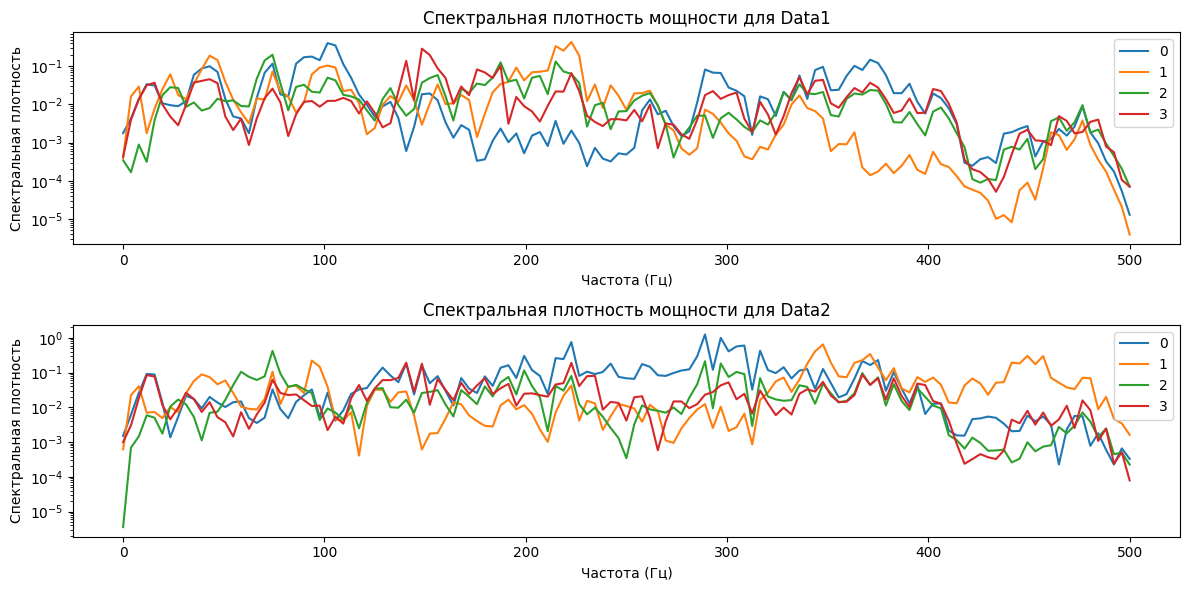

In [127]:
fs = 1000  # Частота дискретизации 
nperseg = 256  # Длина сегмента
noverlap = 128  # Перекрытие сегментов

# Вычисление спектральной плотности для data1
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
for i in range(4):  # Перебор всех сигналов в data1
    f, Pxx_den = welch(data1.iloc[:, i].values, fs=fs, nperseg=nperseg, noverlap=noverlap)
    plt.semilogy(f, Pxx_den, label=f'{i}')
plt.title('Спектральная плотность мощности для Data1')
plt.xlabel('Частота (Гц)')
plt.ylabel('Спектральная плотность')
plt.legend()

# Вычисление спектральной плотности для data2
plt.subplot(2, 1, 2)
for i in range(4):  # Перебор всех сигналов в data2
    f, Pxx_den = welch(data2.iloc[:, i].values, fs=fs, nperseg=nperseg, noverlap=noverlap)
    plt.semilogy(f, Pxx_den, label=f'{i}')
plt.title('Спектральная плотность мощности для Data2')
plt.xlabel('Частота (Гц)')
plt.ylabel('Спектральная плотность')
plt.legend()

plt.tight_layout()
plt.show()

Декомпозиция

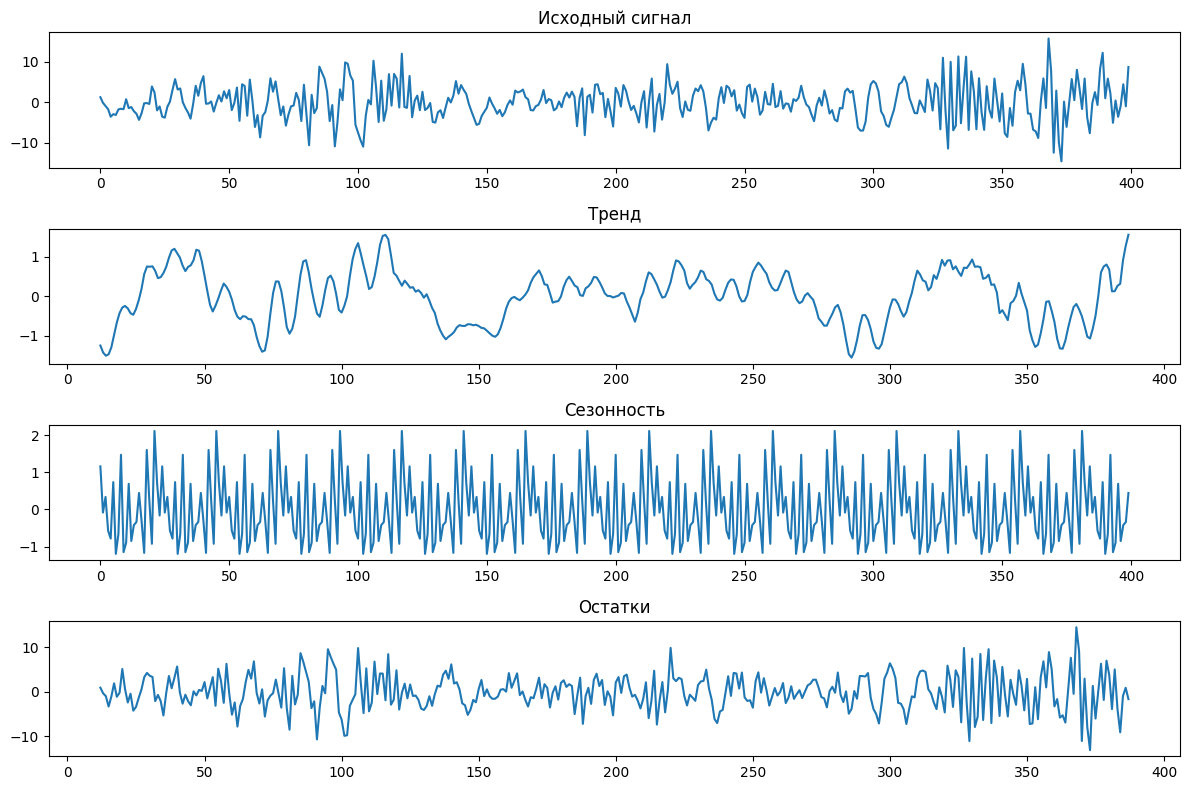

In [128]:
signal_to_decompose = data1.iloc[:, 0]

# STL декомпозиция
result = sm.tsa.seasonal_decompose(signal_to_decompose, model='additive', period=24)

# Извлекаем тренд, сезонность и остатки
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Визуализируем результаты
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(signal_to_decompose)
plt.title('Исходный сигнал')

plt.subplot(4, 1, 2)
plt.plot(trend)
plt.title('Тренд')

plt.subplot(4, 1, 3)
plt.plot(seasonal)
plt.title('Сезонность')

plt.subplot(4, 1, 4)
plt.plot(residual)
plt.title('Остатки')

plt.tight_layout()
plt.show()

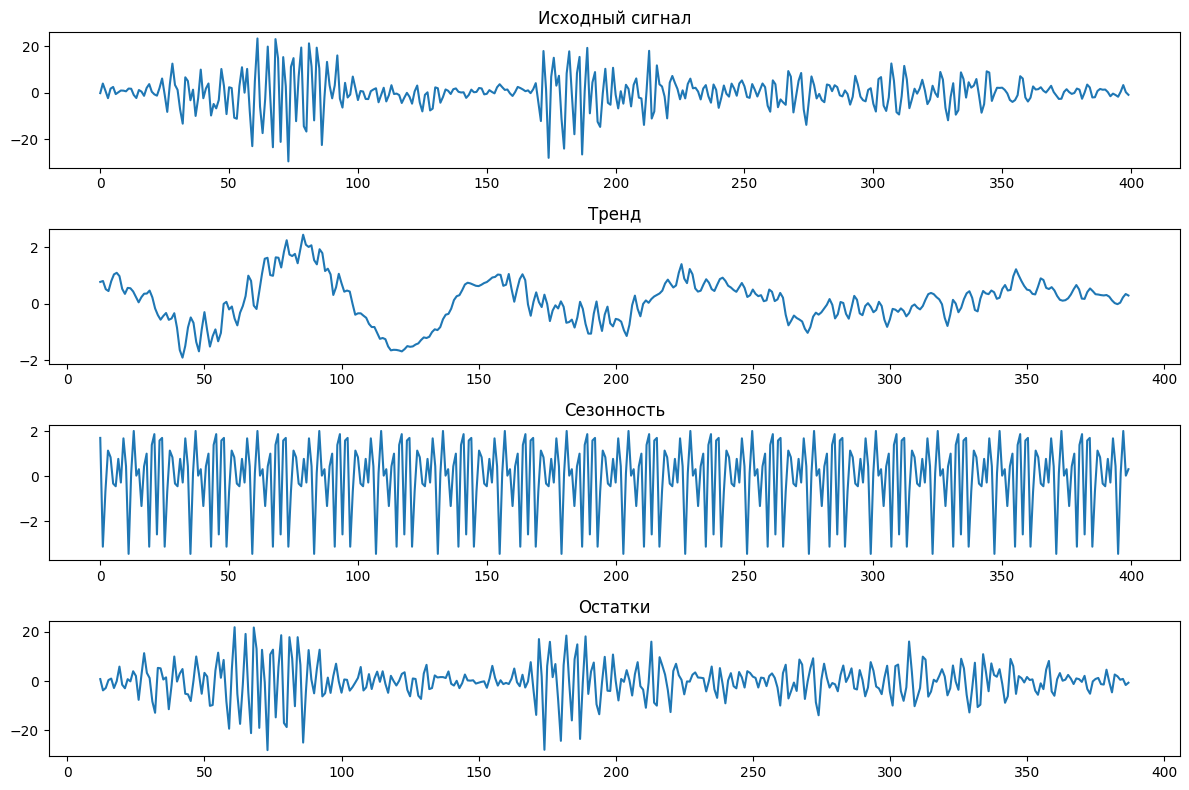

In [129]:
signal_to_decompose = data2.iloc[:, 0]

# STL декомпозиция
result = sm.tsa.seasonal_decompose(signal_to_decompose, model='additive', period=24)
 
# Извлекаем тренд, сезонность и остатки
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Визуализируем результаты
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(signal_to_decompose)
plt.title('Исходный сигнал')

plt.subplot(4, 1, 2)
plt.plot(trend)
plt.title('Тренд')

plt.subplot(4, 1, 3)
plt.plot(seasonal)
plt.title('Сезонность')

plt.subplot(4, 1, 4)
plt.plot(residual)
plt.title('Остатки')

plt.tight_layout()
plt.show()